# Titanic: Machine Learning from Disaster - Kaggle Competition
> Stacy Kam

## importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image 
#import pydotplus
import collections
from IPython.display import Image

## import data

In [4]:
# import data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## cleaning data

In [7]:
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [9]:
train = train.dropna()

## visualizing data

/Users/stacykam/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


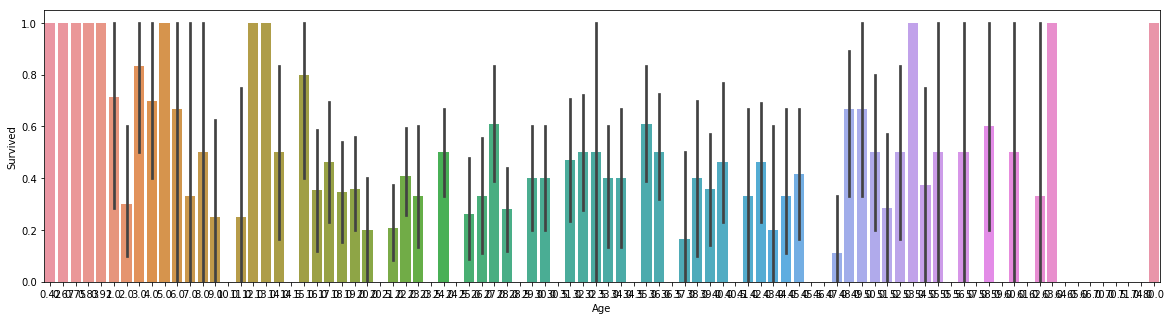

In [10]:
a4_dims = (20, 5)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(train['Age'], train['Survived'], ax = ax)

Here you can see the mean of people that survived based on their age, the bigger the difference between colored bar and gray line the more that didn't survive, while you can observe the first couple group ages there's no gray line so all of them survived. 

## decision tree models

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 81.2+ KB


In [13]:
msk = np.random.rand(len(train)) < 0.8
train2 = train[msk]
test2 = train[~msk]

In [16]:
lb = LabelEncoder()
train2['Embarked'] = lb.fit_transform(train2['Embarked'].astype(str))
train2['Sex'] = lb.fit_transform(train2['Sex'].astype(str))

test2['Embarked'] = lb.fit_transform(test2['Embarked'].astype(str))
test2['Sex'] = lb.fit_transform(test2['Sex'].astype(str))

dt = DecisionTreeClassifier(max_depth = 6, max_leaf_nodes = 10)
x = train2.drop(['Survived', 'PassengerId', 'Name'], axis = 1)
y = train2['Survived']
dt.fit(x, y)

/Users/stacykam/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/stacykam/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/stacykam/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## predictions

In [17]:
x2 = test2.drop(['Survived', 'PassengerId', 'Name'], axis = 1)
dt.predict(x2)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])

In [19]:
## calculating accuracy
cross_val_score(dt, x, y, cv = 20).mean()

0.81418308702791475

In [24]:
# this code won't run in Kaggle because Kaggle doesn't have the pydotplus package included so 
# if you want to see the decision tree visual, just download and run the code
#data_feature_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

#dot_data = export_graphviz(dt,
#                               feature_names=data_feature_names,
#                                out_file=None,
#                                filled=True,
#                                rounded=True)
#graph = pydotplus.graph_from_dot_data(dot_data)

#colors = ('turquoise', 'orange')
#edges = collections.defaultdict(list)

#for edge in graph.get_edge_list():
#   edges[edge.get_source()].append(int(edge.get_destination()))

#for edge in edges:
#    edges[edge].sort()    
#    for i in range(2):
#        dest = graph.get_node(str(edges[edge][i]))[0]
#        dest.set_fillcolor(colors[i])

#graph.write_png('tree.png')

True

![title](./tree.png)